In [68]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [69]:

average_values_by_occupation = df.groupby('Occupation')[['Quality of Sleep', 'Physical Activity Level', 'Stress Level']].mean().reset_index()

average_values_by_occupation


,Occupation,Quality of Sleep,Physical Activity Level,Stress Level
0,Accountant,7.891892,58.108108,4.594595
1,Doctor,6.647887,55.352113,6.732394
2,Engineer,8.412698,51.857143,3.888889
3,Lawyer,7.893617,70.425532,5.063830
4,Manager,7.000000,55.000000,5.000000
5,Nurse,7.369863,78.589041,5.547945
6,Sales Representative,4.000000,30.000000,8.000000
7,Salesperson,6.000000,45.000000,7.000000
8,Scientist,5.000000,41.000000,7.000000
9,Software Engineer,6.500000,48.000000,6.000000


In [70]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [72]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [73]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Normal         219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [74]:
df.duplicated().sum()

0

In [75]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Disorder')

In [76]:
df[['SYSTOLIC', 'DIASTOLIC']] = df['Blood Pressure'].str.split('/', expand=True)

df['SYSTOLIC'] = df['SYSTOLIC'].astype(float)
df['DIASTOLIC'] = df['DIASTOLIC'].astype(float)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [77]:
data = df.copy()

data = data.drop(['Person ID', 'Blood Pressure','BMI Category','Quality of Sleep','Gender','Quality of Sleep'], axis=1)

data.head()

,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,SYSTOLIC,DIASTOLIC
0,27,Software Engineer,6.1,42,6,77,4200,Normal,126.0,83.0
1,28,Doctor,6.2,60,8,75,10000,Normal,125.0,80.0
2,28,Doctor,6.2,60,8,75,10000,Normal,125.0,80.0
3,28,Sales Representative,5.9,30,8,85,3000,Sleep Apnea,140.0,90.0
4,28,Sales Representative,5.9,30,8,85,3000,Sleep Apnea,140.0,90.0


In [78]:
data['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [79]:
occupations_to_rename = ['Software Engineer', 'Scientist', 'Sales Representative', 'Manager']

data['Occupation'] = data['Occupation'].replace(occupations_to_rename, 'Others')

data['Occupation'].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Others         11
Name: count, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original data
data_copy = data.copy()

# Apply Label Encoding to categorical columns (example: 'Occupation')
label_encoder = LabelEncoder()
data_copy['Occupation'] = label_encoder.fit_transform(data_copy['Occupation'])

# You can apply this to any other categorical columns, if necessary
# Assuming 'Occupation' is the only categorical column for this example

# Separate features and target
X = data_copy.drop('Sleep Disorder', axis=1)
y = data_copy['Sleep Disorder']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [81]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoders = {}
cat_columns = ['Occupation','Sleep Disorder']

for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Simpan objek LabelEncoder
for col, le in label_encoders.items():
    joblib.dump(le, f'{col}_label_encoder.pkl')

# Opsional: Simpan DataFrame 'data' yang sudah diubah jika diperlukan
# data.to_csv('data_terproses.csv', index=False)

# Opsional: Tampilkan beberapa baris pertama dari DataFrame yang sudah diubah
print(data.head())


   Age  Occupation  Sleep Duration  Physical Activity Level  Stress Level  \
0   27           5             6.1                       42             6   
1   28           1             6.2                       60             8   
2   28           1             6.2                       60             8   
3   28           5             5.9                       30             8   
4   28           5             5.9                       30             8   

   Heart Rate  Daily Steps  Sleep Disorder  SYSTOLIC  DIASTOLIC  
0          77         4200               1     126.0       83.0  
1          75        10000               1     125.0       80.0  
2          75        10000               1     125.0       80.0  
3          85         3000               2     140.0       90.0  
4          85         3000               2     140.0       90.0  


In [82]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(X, y)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Memisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, train_size=0.7, test_size=0.3, random_state=4)

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Penskalaan data latih
x_train_scaled = scaler.fit_transform(x_train)

# Penskalaan data uji menggunakan scaler yang sama
x_test_scaled = scaler.transform(x_test)

# Simpan objek scaler menggunakan joblib
joblib.dump(scaler, 'minmax_scaler_split.1.pkl')

# Menampilkan bentuk dari data yang sudah di-scala
print(f"x_train_scaled shape: {x_train_scaled.shape}")
print(f"x_test_scaled shape: {x_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train_scaled shape: (459, 9)
x_test_scaled shape: (198, 9)
y_train shape: (459,)
y_test shape: (198,)


Cross-Validation Results:
Accuracy: 0.92 ± 0.02
Precision: 0.92 ± 0.02
Recall: 0.92 ± 0.02
F1-score: 0.92 ± 0.02

Test Data Evaluation:
Accuracy: 0.8585858585858586
Precision: 0.8587974107954849
Recall: 0.8585858585858586
F1-score: 0.8586579434817917


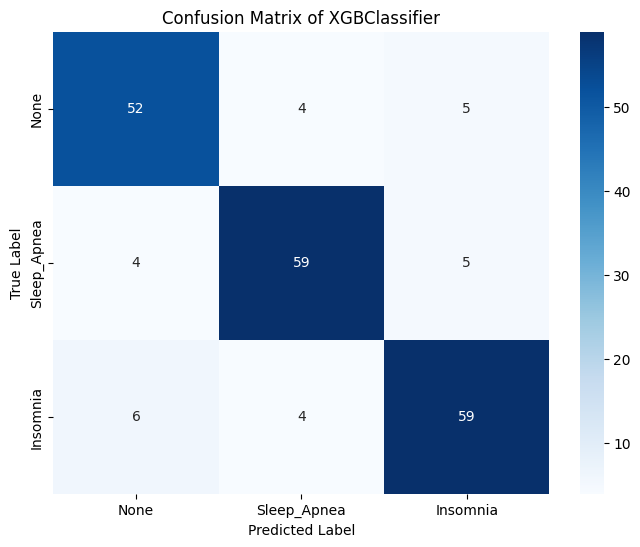

<Figure size 1000x800 with 0 Axes>

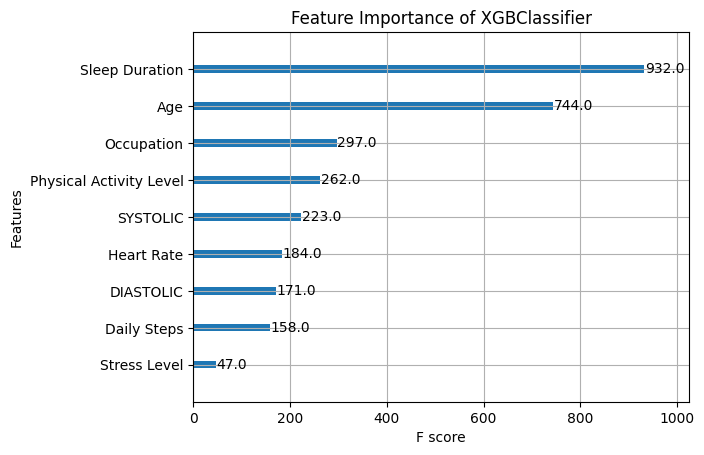


Feature Importance Statistics:
Mean Importance: 0.1111
Min Importance: 0.0141
Max Importance: 0.3254
Feature 0: 0.0141
Feature 1: 0.1364
Feature 2: 0.0184
Feature 3: 0.0644
Feature 4: 0.0329
Feature 5: 0.0841
Feature 6: 0.1192
Feature 7: 0.3254
Feature 8: 0.2051


In [85]:
import pickle
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBClassifier with num_class for multi-class classification
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=3)

# Define the cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation
cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

# Print the average and standard deviation of each metric from cross-validation
print("Cross-Validation Results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")

# Fit the model on the entire training data after cross-validation
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics on test data
print("\nTest Data Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['None', 'Sleep_Apnea', 'Insomnia'], yticklabels=['None', 'Sleep_Apnea', 'Insomnia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of XGBClassifier')
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model)
plt.title('Feature Importance of XGBClassifier')
plt.show()

# Get feature importances from the model
importances = model.feature_importances_

# Calculate statistics for feature importance
mean_importance = np.mean(importances)
min_importance = np.min(importances)
max_importance = np.max(importances)

# Print the statistics of feature importances
print("\nFeature Importance Statistics:")
print(f"Mean Importance: {mean_importance:.4f}")
print(f"Min Importance: {min_importance:.4f}")
print(f"Max Importance: {max_importance:.4f}")

# Optionally, display the feature importance values for each feature
for idx, importance in enumerate(importances):
    print(f"Feature {idx}: {importance:.4f}")

# Save the trained model to a file with pickle
with open('xgb_model_ujicoba.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
